# 영문 워드 클라우드
* https://wikidocs.net/21698 (참고)

In [1]:
# NLTK (natural Language Toolkit)
import nltk

In [2]:
# NLTK에서 사용하는 데이터는 다운로드 받아야 함 - local 주피터는 1회만 다운
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## 1. 불용어(Stopwords)처리

In [4]:
# NLTK Stopwords
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)
print(len(sw_nltk))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
#wordCloud에서 제공하는 불용어(stopwords)
sw_wc = STOPWORDS
print(sw_wc)
print(len(sw_wc))

{'ourselves', 'otherwise', 'myself', 'yourself', 'hence', 'since', "that's", 'here', 'our', "shouldn't", "they've", 'i', 'itself', 'other', "mustn't", 'these', "we've", 'could', 'http', "they'll", "haven't", 'also', "don't", "when's", 'ought', 'very', 'being', "they're", 'about', 'ever', "i'll", "she'd", 'theirs', 'he', 'herself', 'she', 'would', "he'll", "i've", 'what', 'me', 'too', 'have', 'yours', "we're", 'with', 'hers', 'of', 'him', 'own', 'them', "he'd", "how's", 'few', 'during', 'cannot', "here's", 'but', 'should', 'all', "hasn't", "i'd", "i'm", 'why', 'did', "we'll", 'again', 'her', 'or', 'however', 'am', 'before', 'this', 'at', 'only', "won't", "let's", "what's", 'as', 'until', 'below', "wasn't", "aren't", 'for', 'then', "she'll", 'in', "can't", 'any', 'than', 'between', 'r', 'else', 'the', 'they', 'some', "you'd", 'therefore', 'on', 'not', 'an', "there's", "didn't", 'such', "we'd", 'is', 'your', 'down', "hadn't", 'nor', "shan't", 'most', 'into', 'does', 'it', 'once', 'doing',

## 2. Alice in Wonderland

In [6]:
with open('./Alice.txt') as file:
    text = file.read()

In [8]:
# said를 stopwords에 추가
sw_wc.add('said')

In [9]:
wc = WordCloud(background_color='white',
               max_words=2000, stopwords=sw_wc)
wc = wc.generate(text)

In [10]:
count = 0
for key, val in wc.words_.items():
    print(key, ':', val)
    count += 1
    if count > 10:
        break

Alice : 1.0
little : 0.29508196721311475
one : 0.27595628415300544
know : 0.2459016393442623
went : 0.226775956284153
thing : 0.2185792349726776
time : 0.2103825136612022
Queen : 0.20765027322404372
see : 0.1830601092896175
King : 0.17486338797814208
well : 0.1721311475409836


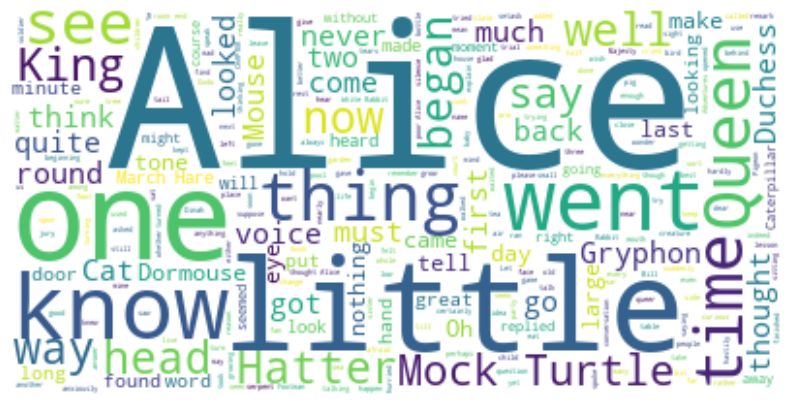

In [11]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

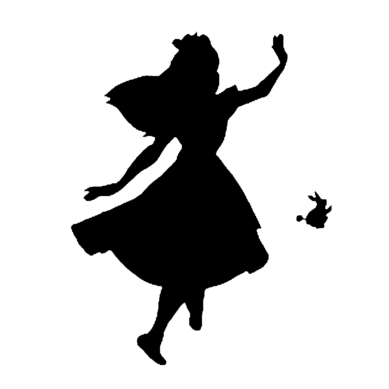

In [12]:
#그림 위에 표시하기
mask = np.array(Image.open('Alice_mask.png'))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
wc = WordCloud(background_color='white', mask=mask,
               max_words=1000, stopwords=sw_wc).generate(text)

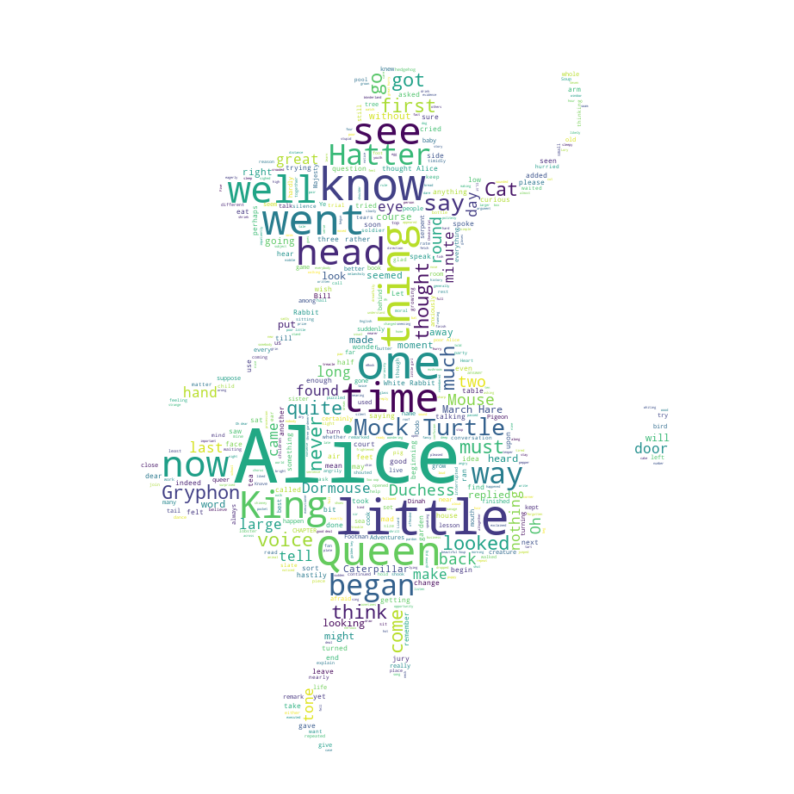

In [14]:
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 3. StarWars

In [15]:
with open('./A_new_hope.txt') as file:
    text = file.read()
text = text.replace('HAN', 'Han').replace("LUKE's", 'Luke') # HAN -> Han, LUKE's -> Luke

In [16]:
# stop words에 int와 ext 추가
sw = STOPWORDS
sw.add('int')
sw.add('ext')
len(sw)

195

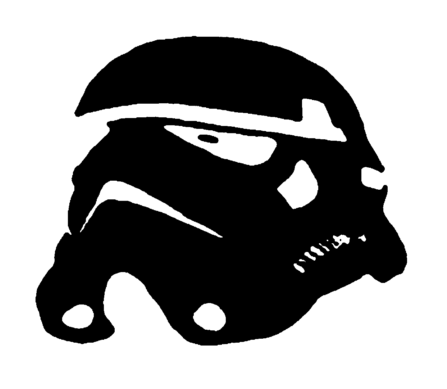

In [18]:
mask = np.array(Image.open('./Stormtrooper_mask.png'))
plt.imshow(mask, cmap = plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
wc = WordCloud(mask=mask, max_words=1000, stopwords=sw, margin=10, random_state=2023).generate(text)
default_color = wc.to_array

In [20]:
# HSL Hue, Satuation lightness
def grey_color(word, font_size, position, orientation, random_state, **kwargs):
    return f'hsl(0, 0%, {np.random.randint(60, 101)}%)'

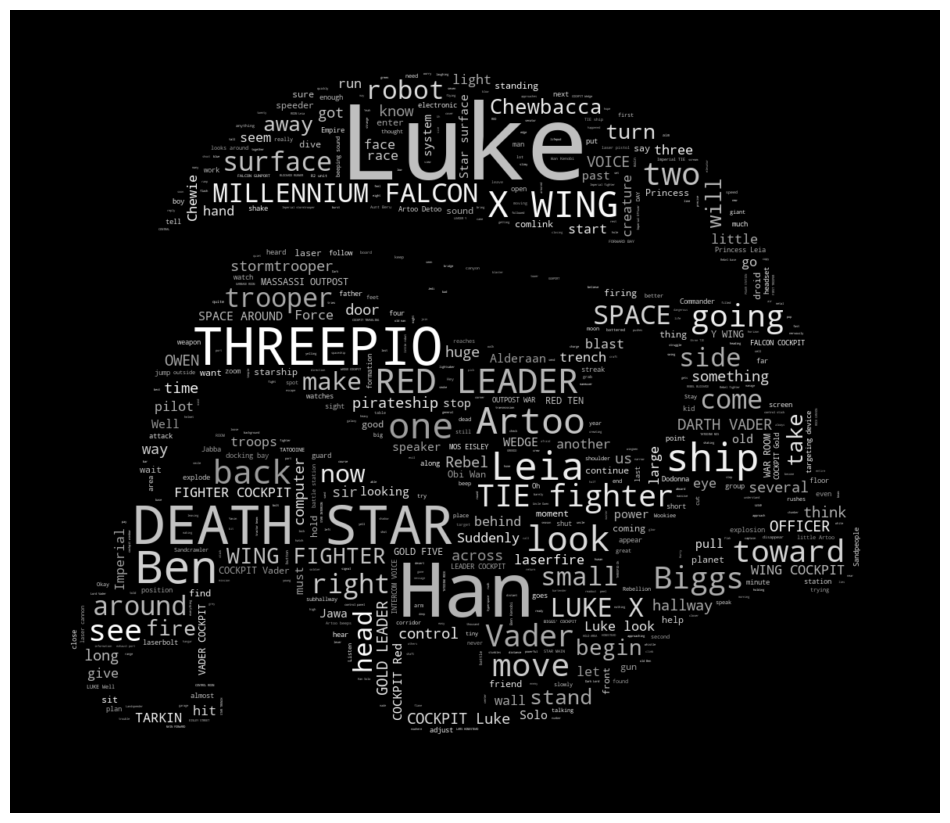

In [21]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2023), interpolation='bilinear')
plt.axis('off')
plt.show()